# Problem 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import operator

Read in csv, extract temperature and CO2 columns, create average vectors.

In [ ]:
f='/home/idies/workspace/AS.171.205/data/atacama-2012-sample.csv'
df=pd.read_csv(f, header=0)
# Set day 70 CO2 values to 0.
df.iloc[1633:1657, 3:5] = 0

# CO2 columns
co2_1=df['c3'];
co2_2=df['c4'];
avgCO2=[x + y for x, y in zip(co2_1, co2_2)]
avgCO2=[x / 2 for x in avgCO2]

# Temp columns
temp1=df['t5'];
temp2=df['t6'];
avgTemp=[x + y for x, y in zip(temp1, temp2)]
avgTemp = [x / 2 for x in avgTemp]

Function to compute Cross Correlation Function.

In [141]:
def crossCor(a,b,tau,N):
    sum=0;
    meanA=np.mean(a);
    meanB=np.mean(b);
    for i in range(0,len(a)-tau):
        sum+=(a[i]-meanA)*(b[i+tau]-meanB)
    return sum / N

Part A: Auto-correlation for temp and CO2.

In [142]:
temp_ac=[];
CO2_ac=[];
for i in range(0,49):
    temp_ac.append(crossCor(avgTemp,avgTemp,i,len(avgTemp)-i))
for i in range(0,49):
    CO2_ac.append(crossCor(avgCO2,avgCO2,i,len(avgCO2)-i))

Graph for Temperature

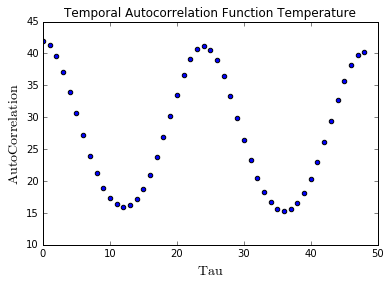

In [143]:
x=range(0,49);
y1=temp_ac
plt.scatter(x,y1)
plt.title("Temporal Autocorrelation Function Temperature")
plt.xlim(0,50)
plt.xlabel(r'$\mathrm{Tau}$', fontsize=14)
plt.ylabel(r'$\mathrm{Auto Correlation}$', fontsize=14)

As seen from the graph, the highest correlation for temperatures (other than 0) is for a tau offset of 24 or 48 hours. This is expected because the temperature at 9 am one day is likely to be very close to the temperature at 9 am the next day. Also, the least correlation occurs at tau offsets of 12 and 36 hours. This is also expected because at any time, say 3 am, will be extremely unrelated to or different from the temperature at 3 pm. It also makes sense that the graph goes up and down, as correlation should increase as tau offset approaches 24 or 48, and decrease as tau offset approaches 12 or 36.

Graph for CO2

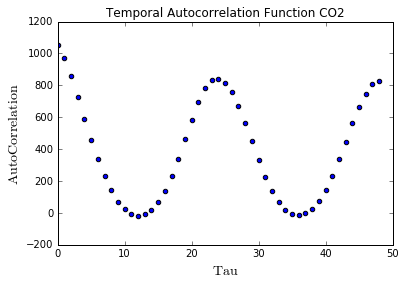

In [144]:
x=range(0,49);
y1=CO2_ac
plt.scatter(x,y1)
plt.title("Temporal Autocorrelation Function CO2")
plt.xlim(0,50)
plt.xlabel(r'$\mathrm{Tau}$', fontsize=14)
plt.ylabel(r'$\mathrm{Auto Correlation}$', fontsize=14)

As seen from the graph, the highest correlation for CO2 concentration (other than 0) is for a tau offset of 24 or 48 hours. Also, the least correlation occurs at tau offsets of 12 and 36 hours. It also makes sense that the graph goes up and down, as correlation should increase as tau offset approaches 24 or 48, and decrease as tau offset approaches 12 or 36. This kind of makes sense because CO2 concentration is probably affected by certain events that happen daily at around the same time. For example, maybe the daily cycle of human activity influences the daily cycle of CO2 concentration.

Part B: Cross-Correlation for temp and CO2.

In [136]:
Cross=[];
for i in range(0,49):
    Cross.append(crossCor(avgCO2,avgTemp,i,len(avgTemp)-i))

Graph

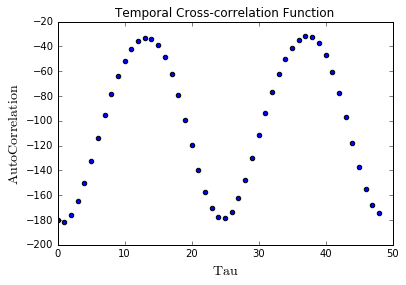

In [138]:
x=range(0,49);
y1=Cross
plt.scatter(x,y1)
plt.title("Temporal Cross-correlation Function")
plt.xlim(0,50)
plt.xlabel(r'$\mathrm{Tau}$', fontsize=14)
plt.ylabel(r'$\mathrm{Cross Correlation}$', fontsize=14)

I wasn't exactly sure what to make of the data. As can be seen, the correlation is negative, so as temperature increases, CO2 decreases, or vice versa. The correlation is strongest once again at an offset of 24 and 48, as this is when the correlation is most negative. Perhaps this suggests that CO2 concentration and temperature are not really related.

Part C: Time Series

In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
# Break into daily vectors.
dt5=[temp1[x:x+24] for x in range(0,len(temp1),24)]
dt6=[temp1[x:x+24] for x in range(0,len(temp1),24)]
newdf=np.column_stack((dt5,dt6))

# I got this from this website: 
# http://blog.districtdatalabs.com/principal-component-analysis-with-python
X_std = StandardScaler().fit_transform(newdf)

mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)

# Perform eigendecomposition on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
47.3598953519
0.838334733681
0.0848192649618
0.0565559070111
0.0367245490053
0.0154120828409
0.00565124403975
0.00253249751865
0.00133730502569
0.00083000090343
0.000321273300593
0.000240958529021
0.00018663103952
0.000138198786356
0.000103460148354
7.55195644862e-05
5.32180624408e-05
4.23830919429e-05
2.61147692892e-05
2.18575203135e-05
1.96759128759e-05
1.78916770459e-05
8.89055170619e-06
1.23346889554e-05
1.76905916295e-16
5.29455841586e-16
5.30887878534e-18
7.24032363806e-26
7.62610425507e-30
7.62610425507e-30
4.74848889217e-30
2.86180516015e-30
2.86180516015e-30
2.35384872333e-30
9.47775293642e-31
9.47775293642e-31
8.2461837374e-31
6.53674338202e-31
6.53674338202e-31
5.53197314019e-31
6.88180989896e-31
6.88180989896e-31
3.58706196002e-31
3.58706196002e-31
4.13597926545e-31
4.13597926545e-31
1.0333306804e-31
1.29737203353e-31


In [166]:
pca = PCA(n_components=3)
pca.fit_transform(newdf)
print(pca.explained_variance_ratio_ )

[ 0.98073323  0.01525196  0.00180862]


The explained variance for the first component is extremely high. Therefore, since the autocorrelation showed highest correlations for offsets of 24, I'm guessing that this component is the hour of the day (from 0 to 23). The next component I'm guessing is the actual day. There are enough days that this might explain some of the variance. Finally, I'm guessing that the third component is CO2. As shown before, there is a negative correlation between CO2 and temperature.

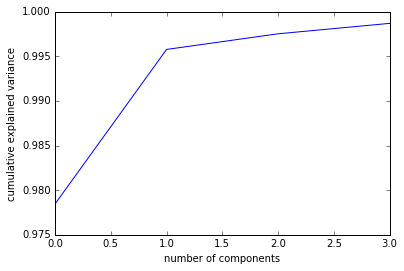

In [170]:
#Explained variance
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim(0,3)
plt.show()
    

This shows that almost all the variance is due to the first 3 principal components.